In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from perceptron import Perceptron
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation

In [58]:
data = pd.read_csv("CSV/BostonHousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [59]:
correlations = data.corr()['indus'].sort_values(ascending=False)
print("Correlations with PRICE:\n", correlations)

Correlations with PRICE:
 indus      1.000000
nox        0.763651
tax        0.720760
age        0.644779
lstat      0.603800
rad        0.595129
crim       0.406583
ptratio    0.383248
chas       0.062938
b         -0.356977
rm        -0.391676
medv      -0.483725
zn        -0.533828
dis       -0.708027
Name: indus, dtype: float64


In [60]:
X = data[['nox', 'tax']].values
Y = data['indus'].values.reshape(-1, 1)
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X = scaler_X.fit_transform(X)
Y = scaler_Y.fit_transform(Y)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [62]:
perceptron = Perceptron(input_size=2, lr=0.01, epochs=200)
perceptron.fit(X_train, Y_train)

In [63]:
mse = perceptron.evaluate(X_test, Y_test)
print("Mean Squared Error on Test Data (MSE):", mse)

Mean Squared Error on Test Data (MSE): 0.10328847880779728


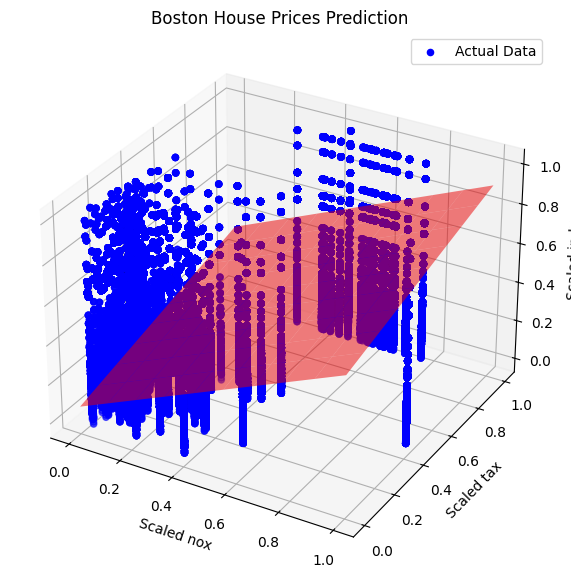

In [66]:
predictions = perceptron.predict(X)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Boston House Prices Prediction")
scatter = ax.scatter(X[:, 0], X[:, 1], Y, color="blue", label="Actual Data")
x_surf, y_surf = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
z_surf = perceptron.w[0] * x_surf + perceptron.w[1] * y_surf + perceptron.b
plane = ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel("Scaled nox")
ax.set_ylabel("Scaled tax")
ax.set_zlabel("Scaled indus")
ax.legend()
plt.show()